Using Kernel=POLY

Accuracy: 0.8866666666666667


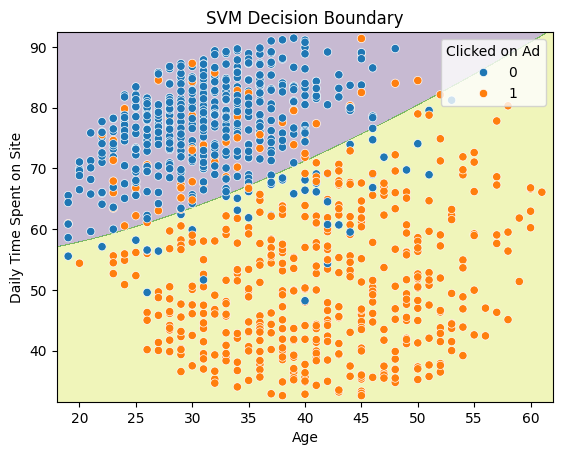

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


dataset = pd.read_csv('/content/advertising.csv')


X = dataset[['Age', 'Daily Time Spent on Site']]
y = dataset['Clicked on Ad']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


model = SVC(kernel='poly',degree=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
Z = model.predict(grid)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y)
plt.xlabel("Age")
plt.ylabel("Daily Time Spent on Site")
plt.title("SVM Decision Boundary")
plt.show()


Using different Hyperperamaters

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.1, 1, 10]
gammas = [0.1, 1, 'scale']


accuracy_matrix = np.zeros((len(Cs), len(gammas)))


for i, kernel in enumerate(kernels):
    for j, C in enumerate(Cs):
        for k, gamma in enumerate(gammas):
            model = SVC(kernel=kernel, C=C, gamma=gamma)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            accuracy_matrix[j, k] = accuracy


    plt.figure(figsize=(8, 6))
    sns.heatmap(accuracy_matrix, annot=True, cmap='coolwarm', xticklabels=gammas, yticklabels=Cs)
    plt.title(f"Accuracy Heatmap for Kernel: {kernel}")
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.show()


